# CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab

/content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions_2_ as fun
import deep_learning_helper as dp
import keras
import tensorflow as tf
import sklearn

%load_ext autoreload
%autoreload 2

from keras import models
from tensorflow.keras import layers

# Load the data 

In [ ]:
# load the dataset
dataset = pd.read_csv('training_data.csv')
# dropp unncecassary columns
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.head()

,epoch_utc,emission_factor,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,298.240217,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,266.522473,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,262.594215,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,260.190772,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,250.496683,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


In [ ]:
# Split dataset int targe = co2 emisssions and features

# get co2 emissions
co2 = dataset['emission_factor']

# get features
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [ ]:
# check co2 data
co2.head()

0    298.240217
1    266.522473
2    262.594215
3    260.190772
4    250.496683
Name: emission_factor, dtype: float64

In [ ]:
# check features
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


## Feature Enginnering

### Create lagged features

In [ ]:
# create 26 laggs of the co2 emission factor

co2_lag = fun.make_lags(co2, lags = 26)
co2_lag = co2_lag.fillna(0.0)
co2_lag.head()

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9,y_lag_10,...,y_lag_17,y_lag_18,y_lag_19,y_lag_20,y_lag_21,y_lag_22,y_lag_23,y_lag_24,y_lag_25,y_lag_26
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,298.240217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,266.522473,298.240217,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,262.594215,266.522473,298.240217,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,260.190772,262.594215,266.522473,298.240217,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# add lag 24 and 26 to the features

features[['co2_24_lag','co2_26_lag']] = co2_lag[['y_lag_24','y_lag_26']].set_index(features.index)
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export,co2_24_lag,co2_26_lag
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0,0.0,0.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0,0.0,0.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0,0.0,0.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0,0.0,0.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0,0.0,0.0


### Create temproal features

In [ ]:
# get datetime type timestemps from fetures
date =pd.to_datetime(features.datetime_de)

In [ ]:
# one hot encoding of timestemps of features

features['hour_of_day'] = date.dt.hour # get hour of the given day
features['day_of_week'] = date.dt.weekday # get day of current weak
features['hour_of_year'] = ((date.dt.dayofyear-1) * 24) + date.dt.hour # get hour of current year
features = features.drop(columns=['datetime_de', 'epoch_utc']) # drop the timestemps
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,NL_export,PL_import,PL_export,CH_import,CH_export,co2_24_lag,co2_26_lag,hour_of_day,day_of_week,hour_of_year
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,1354.0,224.0,0.0,0.0,800.0,0.0,0.0,23,0,8759
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,1158.0,0.0,0.0,1.0,801.0,0.0,0.0,0,1,0
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,1176.0,0.0,0.0,0.0,800.0,0.0,0.0,1,1,1
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,1428.0,0.0,0.0,0.0,800.0,0.0,0.0,2,1,2
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,1492.0,0.0,0.0,0.0,800.0,0.0,0.0,3,1,3


In [ ]:
features['day_of_week'].replace({0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}, inplace=True)
features = pd.get_dummies(features, columns=['day_of_week'])
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,co2_26_lag,hour_of_day,hour_of_year,day_of_week_fri,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,0.0,23,8759,0,1,0,0,0,0,0
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,0.0,0,0,0,0,0,0,0,1,0
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,0.0,1,1,0,0,0,0,0,1,0
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,0.0,2,2,0,0,0,0,0,1,0
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,0.0,3,3,0,0,0,0,0,1,0


In [ ]:
# transform hourly features into ciclical data

features_temp = ['hour_of_day', 'hour_of_year']
corr_numbers = [24, 8760]# hours in a day and hours in a year
for f, n in zip(features_temp, corr_numbers):
    features[f + '_sin'] = np.sin(features[f]*(2.*np.pi/n))
    features[f + '_cos'] = np.cos(features[f]*(2.*np.pi/n))
features.drop(columns=features_temp, inplace=True)
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,1,0,0,0,0,0,-0.258819,0.965926,-0.000717,1.000000
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,0,0,0,0,1,0,0.258819,0.965926,0.000717,1.000000
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,0,0,0,0,1,0,0.500000,0.866025,0.001435,0.999999
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,0,0,0,0,1,0,0.707107,0.707107,0.002152,0.999998


### Train Test Split

In [ ]:
# define the percentage of the train set
train_ratio = 0.7
val_ratio = 0.9
n = len(co2)#
assert(n == len(features))

# split the target into train and test set
co2_train = co2[0:int(n*train_ratio)]
co2_train_val = co2[0:int(n*val_ratio)]
co2_val = co2[int(n*train_ratio):int(n*val_ratio)]
co2_test = co2[int(n*val_ratio):]

# split the features into train and test set
features_train = features[0:int(n*train_ratio)]
features_train_val = features[0:int(n*val_ratio)]
features_val = features[int(n*train_ratio):int(n*val_ratio)]
features_test = features[int(n*val_ratio):]

# split the date data
date_val = date[int(n*train_ratio):int(n*val_ratio)]
date_test = date[int(n*val_ratio):]

assert( len(co2_train) == len(features_train))
assert( len(co2_train_val) == len(features_train_val))
assert( len(co2_val) == len(features_val))
assert( len(co2_test) == len(features_test))

In [ ]:
#get number of features
n_features = len(features.columns)
print(n_features)

32


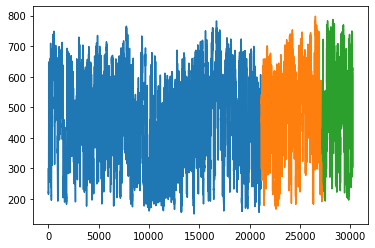

In [ ]:
# check the train test split by plotting both

plt.plot(co2_train)
plt.plot(co2_val)
plt.plot(co2_test)
plt.show()

### Create walk forward split

In [ ]:
n_val = co2_val.shape[0]
val_split = 8
val_len = n_val // val_split
assert( n_val % val_split == 0)
print('This is the length of the validation data set:', n_val)
print('This is the number of validation splits:', val_split)
print('This is the length of one validation split:', val_len)

This is the length of the validation data set: 6048
This is the number of validation splits: 8
This is the length of one validation split: 756


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
# get object that contains split indexes accorcing to the test lenght and the forecast period

#define forecast period
forecast_period = 24
tscv_val = TimeSeriesSplit(gap = 0, test_size= val_len, n_splits = val_split)
tscv_test = TimeSeriesSplit(gap = 0, test_size= forecast_period, n_splits = int(len(co2_test)/forecast_period))

In [ ]:
for train_index, test_index in tscv_val.split(co2_train_val):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = features.values[train_index], features.values[test_index]
    #y_train, y_test = co2.values[train_index], co2.values[test_index]
    test_index?

In [ ]:
co2_train_val.shape, co2_test.shape, co2.shape, co2_val.shape

((27215,), (3024,), (30239,), (6048,))

In [ ]:
# check the number of splits for the forward validation
tscv_val.get_n_splits(), tscv_test.get_n_splits()

(8, 126)

In [ ]:
# check if the tscv splits align with the test data set
assert(tscv_val.get_n_splits() == co2_val.shape[0] / val_len)
assert(tscv_test.get_n_splits() == co2_test.shape[0] / forecast_period)

# Define the Neural Network

In [4]:
import tensorflow as tf
## weird gpu stuff
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
features_train_val.shape

(27215, 32)

In [ ]:
#co2_train_val = np.array(co2_train_val)
#co2_train_val.shape

In [ ]:
features_train_val = features_train_val.values.reshape(features_train_val.shape[0],features_train_val.shape[1],1)
features_train_val.shape

(27215, 32, 1)

In [ ]:
from keras.layers import Dense, BatchNormalization
#from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Conv1D, Flatten, MaxPooling1D
import keras.backend as K
import keras
#### Todos:
# define root mean squared error loss
# add probabiltic prediction
# try out activation laysers -done
# ty out otimizers -done


In [5]:
learning_rate = 0.001
loss = 'mse'
n_features = 32
optimizer = tf.keras.optimizers.Adam(learning_rate)
activation = 'relu'
dp_rate = 0.5
metrics=[tf.keras.metrics.RootMeanSquaredError()]
initializer_cnn = tf.keras.initializers.GlorotNormal(seed=42)
initializer = tf.keras.initializers.GlorotNormal(seed=42)

In [11]:
model_cnn = dp.CNN(n_features, learning_rate, activation, loss, optimizer, dp_rate,initializer, initializer_cnn)
#model_mlp.build()

In [12]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 30, 128)           512       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 128)          512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 128)           49280     
                                                                 
 batch_normalization_4 (Batc  (None, 13, 128)          512       
 hNormalization)                                                 
                                                        

# Walk forward Validation

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    verbose = 0,
    patience = 25,
    mode = 'auto',
    restore_best_weights = True
)

In [ ]:
from numpy.random import seed

In [ ]:
seed(42)
tf.random.set_seed (42)

In [ ]:
alpha_low = 0.025
alpha_high = 0.975
lower_val, mean_val, upper_val, report_val = dp.walk_forward_deep_learning_cnn(tscv_val, co2_train_val, features_train_val, co2_val, alpha_low, alpha_high,n_features, callback ,learning_rate = learning_rate, loss = loss, optimizer = optimizer, activation = activation, dp_rate = dp_rate, initializer=initializer, initializer_cnn =initializer_cnn, batch_size =12, epochs = 200, num_preds = 75, method = 'CNN', refit = False, validation = True)
print(report_val)

Epoch 1/200
1764/1764 [==============================] - 25s 8ms/step - loss: 11587.8564 - val_loss: 7804.3135
Epoch 2/200
1764/1764 [==============================] - 13s 7ms/step - loss: 6288.1597 - val_loss: 6104.0498
Epoch 3/200
1764/1764 [==============================] - 13s 7ms/step - loss: 4853.3599 - val_loss: 5900.8262
Epoch 4/200
1764/1764 [==============================] - 13s 7ms/step - loss: 4393.5562 - val_loss: 3746.1248
Epoch 5/200
1764/1764 [==============================] - 13s 7ms/step - loss: 3972.0142 - val_loss: 4520.3486
Epoch 6/200
1764/1764 [==============================] - 13s 7ms/step - loss: 3793.1191 - val_loss: 9666.9941
Epoch 7/200
1764/1764 [==============================] - 13s 7ms/step - loss: 3780.3181 - val_loss: 6564.8716
Epoch 8/200
1764/1764 [==============================] - 13s 7ms/step - loss: 3548.5251 - val_loss: 4277.7515
Epoch 9/200
1764/1764 [==============================] - 13s 7ms/step - loss: 3505.4573 - val_loss: 5120.4092
Epoch 10/

In [ ]:
cnn_val_df = pd.DataFrame(mean_val)
#cnn_val_df.index = co2_val.index
cnn_val_df

,0
0,557.765137
1,571.973389
2,537.926147
3,543.959839
4,578.484924
...,...
6043,379.757019
6044,363.265503
6045,350.499146
6046,336.082886


In [ ]:
print(np.mean(upper_val-lower_val))

107.34388686248228


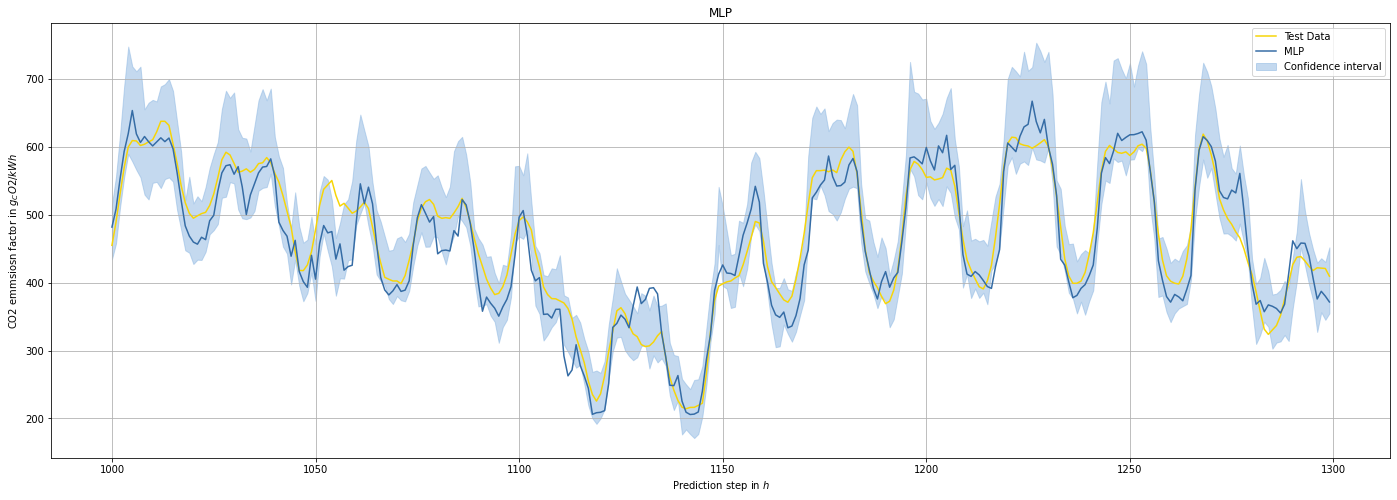

In [ ]:
fun.plot_model_uncertainty(co2_val, cnn_val_df,lower_val[:,0],upper_val[:,0], slice_start = 1000, slice_end = 1300 , method = 'CNN')

In [ ]:
import joblib

In [ ]:
joblib.dump(model_cnn, 'cnn_model.pkl')

INFO:tensorflow:Assets written to: ram://19009277-2ba2-4332-bc55-ff679c5bd02f/assets


INFO:tensorflow:Assets written to: ram://19009277-2ba2-4332-bc55-ff679c5bd02f/assets


['cnn_model.pkl']

In [ ]:
model_cnn = joblib.load('cnn_model.pkl')

# walk forward testing

In [ ]:
callback_test = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    verbose = 0,
    patience = 15,
    mode = 'auto',
    restore_best_weights = True
)

In [ ]:
learning_rate = 0.001
loss = 'mse'
optimizer = tf.keras.optimizers.Adam(learning_rate)
activation = 'relu'
dp_rate = 0.5
metrics=[tf.keras.metrics.RootMeanSquaredError()]
initializer_cnn = tf.keras.initializers.GlorotNormal(seed=42)
initializer = tf.keras.initializers.GlorotNormal(seed=42)

In [ ]:
features = features.values.reshape(features.shape[0],features.shape[1],1)
features.shape

(30239, 32, 1)

In [ ]:
#model_cnn_test = dp.CNN(n_features, learning_rate, activation, loss, optimizer, dp_rate, metrics)
#model_mlp.build()

In [ ]:
alpha_low = 0.025
alpha_high = 0.975
lower_test, mean_test, upper_test, report_test = dp.walk_forward_deep_learning_cnn2(tscv_test, co2, features, co2_test, alpha_low, alpha_high,n_features, callback_test ,learning_rate = learning_rate, loss = loss, optimizer = optimizer,activation = activation, dp_rate = dp_rate, initializer=initializer, initializer_cnn =initializer_cnn, batch_size =12, epochs = 200, num_preds = 75, method = 'CNN', refit = True, validation = False)
print(report_test)

27191
27215
(24, 1)
0
27215
27239
(24, 1)
1
27239
27263
(24, 1)
2
27263
27287
(24, 1)
3
27287
27311
(24, 1)
4
27311
27335
(24, 1)
5
27335
27359
(24, 1)
6
27359
27383
(24, 1)
7
27383
27407
(24, 1)
8
27407
27431
(24, 1)
9
27431
27455
(24, 1)
10
27455
27479
(24, 1)
11
27479
27503
(24, 1)
12
27503
27527
(24, 1)
13
27527
27551
(24, 1)
14
27551
27575
(24, 1)
15
27575
27599
(24, 1)
16
27599
27623
(24, 1)
17
27623
27647
(24, 1)
18
27647
27671
(24, 1)
19
27671
27695
(24, 1)
20
27695
27719
(24, 1)
21
27719
27743
(24, 1)
22
27743
27767
(24, 1)
23
27767
27791
(24, 1)
24
27791
27815
(24, 1)
25
27815
27839
(24, 1)
26
27839
27863
(24, 1)
27
27863
27887
(24, 1)
28
27887
27911
(24, 1)
29
27911
27935
(24, 1)
30
27935
27959
(24, 1)
31
27959
27983
(24, 1)
32
27983
28007
(24, 1)
33
28007
28031
(24, 1)
34
28031
28055
(24, 1)
35
28055
28079
(24, 1)
36
28079
28103
(24, 1)
37
28103
28127
(24, 1)
38
28127
28151
(24, 1)
39
28151
28175
(24, 1)
40
28175
28199
(24, 1)
41
28199
28223
(24, 1)
42
28223
28247
(24, 1)
4

In [ ]:
''

''

In [ ]:
report_test?

In [ ]:
print(co2_test)

In [ ]:
cnn_test_df = pd.read_csv('best_cnn_mean_wf_best.csv')

In [ ]:
cnn_test_df = cnn_test_df.drop(columns='Unnamed: 0')
cnn_test_df.head()

,0
0,364.24910
1,362.90580
2,356.20395
3,340.65677
4,341.39584


In [ ]:
lower_test_df = pd.read_csv('best_cnn_lower_wf_best.csv')

In [ ]:
lower_test_df = lower_test_df.drop(columns='Unnamed: 0')
lower_test_df.head()

,0
0,322.656520
1,295.637949
2,305.843425
3,288.703377
4,282.457266


In [ ]:
upper_test_df = pd.read_csv('best_cnn_upper_wf_best.csv')

In [ ]:
upper_test_df = upper_test_df.drop(columns='Unnamed: 0')
upper_test_df.head()

,0
0,428.349857
1,441.648518
2,402.207651
3,394.255734
4,404.285648


In [ ]:
cnn_test_df = pd.DataFrame(mean_test)
cnn_test_df.head() 

,0
0,364.249115
1,362.905792
2,356.203949
3,340.656769
4,341.395844


In [ ]:
lower_test_df = pd.DataFrame(lower_test)

In [ ]:
upper_test_df = pd.DataFrame(upper_test)

In [ ]:
cnn_test_df.to_csv('best_cnn_mean_wf_best.csv')

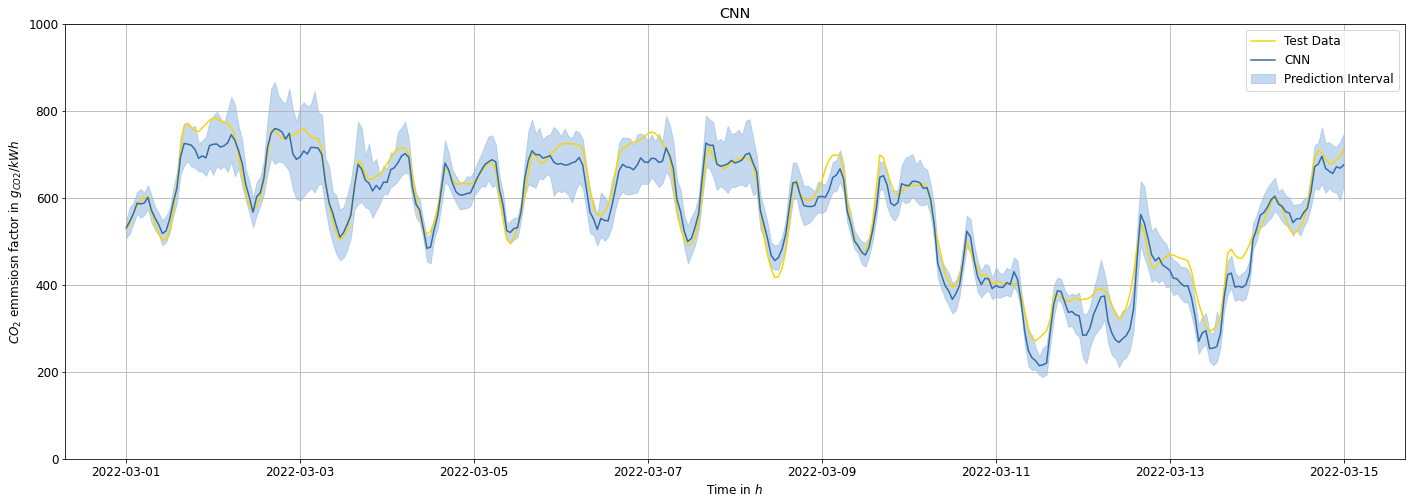

In [ ]:
fun.plot_model_uncertainty(co2_test, cnn_test_df,lower_test_df,upper_test_df, date_test, slice_start = '2022-03-01 00:00', slice_end =  '2022-03-15 00:00', method = 'CNN')

In [ ]:
cnn_test_report_01 = open("/content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab/cnn_test_report_wf_best.txt", 'w')
cnn_test_report_01.write(report_test)
cnn_test_report_01.close()

In [ ]:
lower_test_df = pd.DataFrame(lower_test)
lower_test_df.to_csv('best_cnn_lower_wf_best.csv')

In [ ]:
upper_test_df = pd.DataFrame(upper_test)
upper_test_df.to_csv('best_cnn_upper_wf_best.csv')